Comparison stylized facts: Gaussian vs Financial data

Volatility clustering

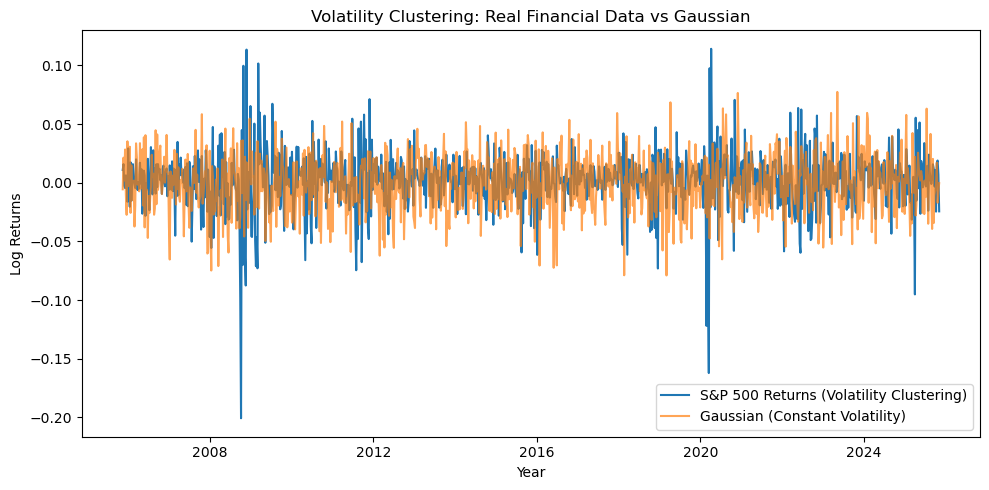

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load your data ---
file_path = r"C:\Users\roosd\Downloads\econometrie jaar 3\Thesis\sp500_weekly.csv"
df = pd.read_csv(file_path)

# --- Parse and sort dates ---
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# --- Extract log returns ---
returns = df['LogReturn'].dropna()
gaussian = np.random.normal(0, returns.std(), len(returns))

# --- Align time index ---
dates = df['Date'].iloc[-len(returns):]

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(dates, returns.values, label="S&P 500 Returns (Volatility Clustering)", color='tab:blue')
plt.plot(dates, gaussian, label="Gaussian (Constant Volatility)", color='tab:orange', alpha=0.7)
plt.title("Volatility Clustering: Real Financial Data vs Gaussian")
plt.xlabel("Year")
plt.ylabel("Log Returns")
plt.legend()
plt.tight_layout()
plt.show()




Skewness & heavy tails

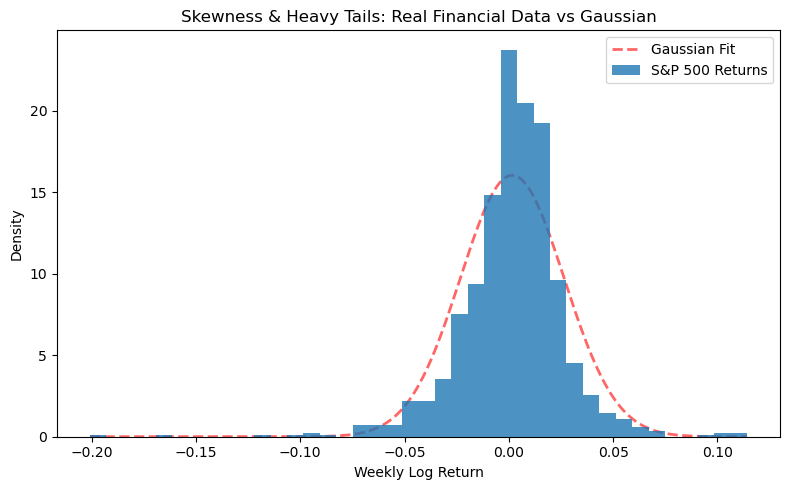

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Load your local data ---
file_path = r"C:\Users\roosd\Downloads\econometrie jaar 3\Thesis\sp500_weekly.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
returns = df['LogReturn'].dropna()

# --- Gaussian fit ---
mean, std = returns.mean(), returns.std()
x = np.linspace(returns.min(), returns.max(), 500)
gauss_pdf = norm.pdf(x, loc=mean, scale=std)

# --- Plot (Gaussian drawn first, histogram on top) ---
plt.figure(figsize=(8,5))
plt.plot(x, gauss_pdf, 'r--', linewidth=2, alpha=0.6, label='Gaussian Fit', zorder=1)  # draw behind
plt.hist(returns, bins=40, density=True, alpha=0.8, label='S&P 500 Returns', color='tab:blue', zorder=2)

plt.title("Skewness & Heavy Tails: Real Financial Data vs Gaussian")
plt.xlabel("Weekly Log Return")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()





Return independence

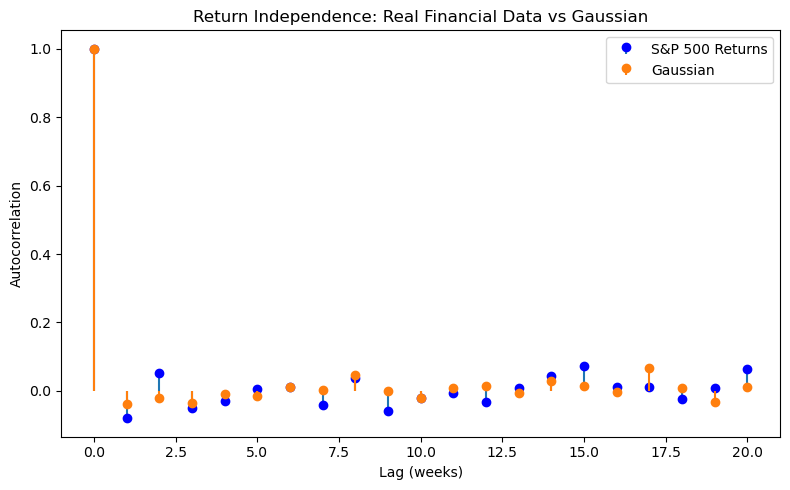

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# --- Load data ---
file_path = r"C:\Users\roosd\Downloads\econometrie jaar 3\Thesis\sp500_weekly.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

returns = df['LogReturn'].dropna()
gaussian = np.random.normal(0, returns.std(), len(returns))

# --- Compute autocorrelation ---
lags = 20
acf_real = acf(returns, nlags=lags)
acf_gauss = acf(gaussian, nlags=lags)

plt.figure(figsize=(8,5))
plt.stem(range(lags+1), acf_real, linefmt='tab:blue', markerfmt='bo', basefmt=' ')
plt.stem(range(lags+1), acf_gauss, linefmt='tab:orange', markerfmt='o', basefmt=' ')
plt.title("Return Independence: Real Financial Data vs Gaussian")
plt.xlabel("Lag (weeks)")
plt.ylabel("Autocorrelation")
plt.legend(["S&P 500 Returns", "Gaussian"])
plt.tight_layout()
plt.show()
